# Exploratory Data Analysis

This notebook performs exploratory data analysis on the dataset.

## Objectives:
1. Understand the dataset structure
2. Analyze feature distributions
3. Identify patterns and correlations

### Imports

In [10]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Set the style for better visualization
plt.style.use('default')
sns.set_theme(style="white")

c:\Users\harig\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_statistics.py:32: UserWarning: A NumPy version >=1.23.5 and <2.3.0 is required for this version of SciPy (detected version 2.3.4)
  from scipy.stats import gaussian_kde


### Reading Data

In [3]:
# Load the dataset
df = pd.read_csv('../data/Churn_Modelling.csv')

print("Columns: ", df.columns)
print(df.head(5).to_string())

Columns:  Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited
0          1    15634602  Hargrave          619    France  Female   42       2       0.00              1          1               1        101348.88       1
1          2    15647311      Hill          608     Spain  Female   41       1   83807.86              1          0               1        112542.58       0
2          3    15619304      Onio          502    France  Female   42       8  159660.80              3          1               0        113931.57       1
3          4    15701354      Boni          699    France  Female   39       1       0.00              2          0               0      

### Basic Dataset Info

In [4]:
print("Dataset Shape:", df.shape)
print("\nDataset Info:\n")
print(df.info())

Dataset Shape: (10000, 14)

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None


### Descriptive Analysis and Checking Null 

In [5]:
# Get statistical summary of numerical columns
print("Statistical Summary of Numerical Features:")
print(df.describe())

# Check for missing values
print("\nMissing Values:", df.isnull().sum().sum())

Statistical Summary of Numerical Features:
         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584  

### Correlation Analysis

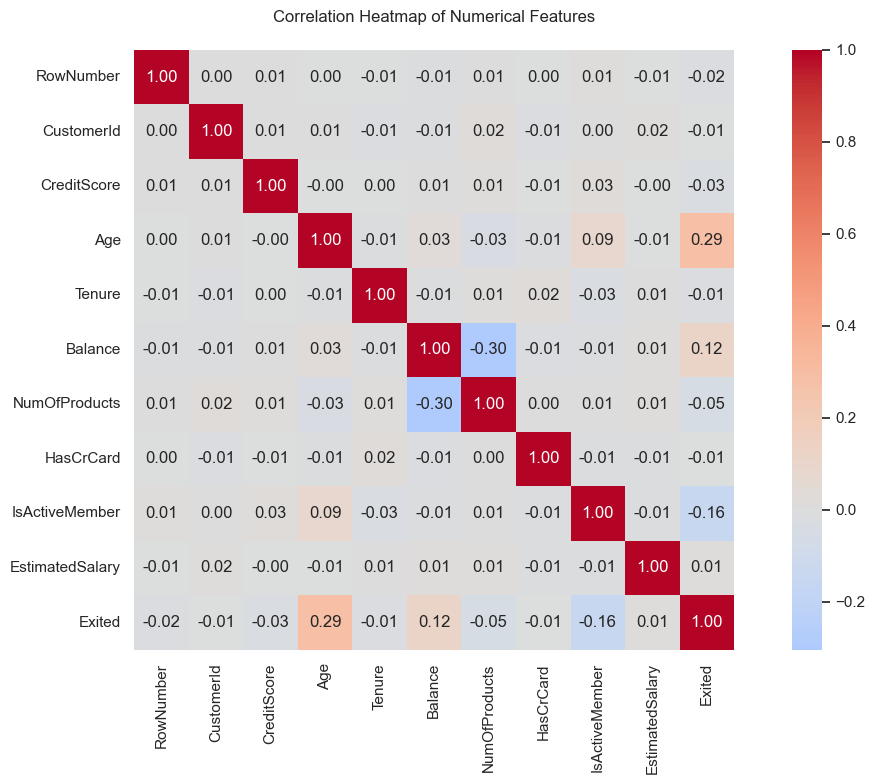

In [11]:
# Create correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), 
            annot=True,        # Show correlation values
            cmap='coolwarm',   # Color scheme
            center=0,          # Center the colormap at 0
            fmt='.2f',         # Format annotations to 2 decimal places
            square=True)       # Make the plot square-shaped

plt.title('Correlation Heatmap of Numerical Features', pad=20)
plt.tight_layout()
plt.show()

### Skewness Analysis

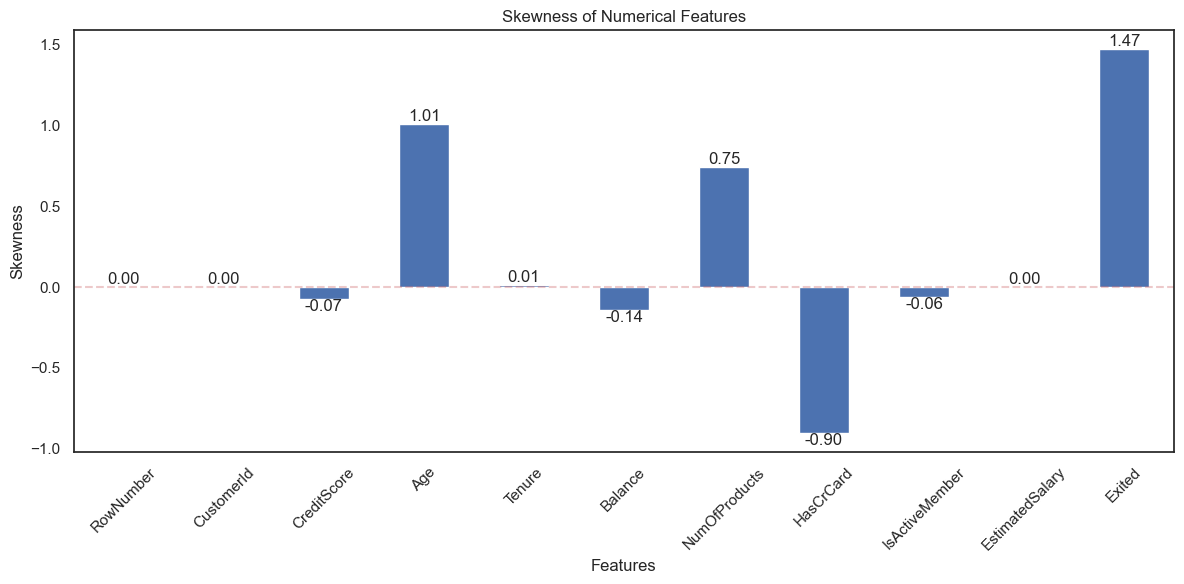

In [14]:
# Calculate skewness for numerical columns
skew_values = df.skew(numeric_only=True)

# Create bar plot
plt.figure(figsize=(12, 6))
skew_values.plot(kind='bar')
plt.title('Skewness of Numerical Features')
plt.xlabel('Features')
plt.ylabel('Skewness')
plt.xticks(rotation=45)
plt.axhline(y=0, color='r', linestyle='--', alpha=0.3)  # Add reference line at y=0

# Add value labels on top of each bar
for i, v in enumerate(skew_values):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom' if v >= 0 else 'top')

plt.tight_layout()
plt.show()

### Duplicate Checking

In [17]:
df.duplicated().sum()

np.int64(0)

### Understanding Target Variable 

0 79.63
1 20.369999999999997


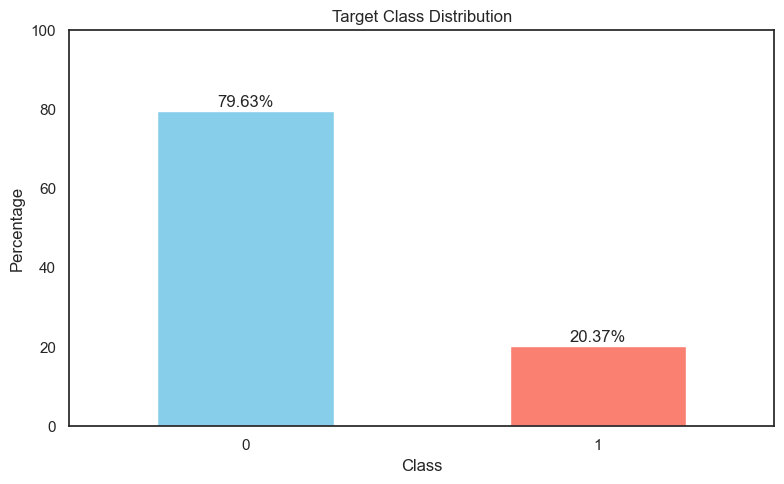

In [16]:
target_proportion = df['Exited'].value_counts(normalize=True).multiply(100)

# Create a bar plot for target class distribution
plt.figure(figsize=(8, 5))
target_proportion.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Target Class Distribution')
plt.xlabel('Class')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.ylim(0, 100)

# Add value labels on top of each bar
for i, v in enumerate(target_proportion):
    print(i, v)
    plt.text(i, v + 1, f'{v:.2f}%', ha='center')

plt.tight_layout()
plt.show()